In [1]:
# %conda install -c conda-forge tesseract
# %conda install -c conda-forge poppler 

In [2]:
from unstructured.partition.pdf import partition_pdf

e:\MINICONDA3\ENVS\RAG04\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Matplotlib is building the font cache; this may take a moment.


In [9]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('words')

file_path = "attention.pdf"

chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,
    strategy="hi_res",
    extract_image_block_types=["Image"],
    extract_image_block_to_payload=True,
    chunking_strategy="by_title",
    max_characters=10000,
    combine_text_under_n_chars=2000,
    new_after_n_chars=6000
)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Bidhi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Bidhi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Bidhi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Bidhi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


In [10]:
from IPython.display import Markdown, display

display(Markdown(str(chunks[2].text)))

3 Model Architecture

Most competitive neural sequence transduction models have an encoder-decoder structure [5] [2] 35). Here, the encoder maps an input sequence of symbol representations (21, ...,%,,) to a sequence of continuous representations z = (z1,...,2n). Given z, the decoder then generates an output sequence (yj, ..., Ym) of symbols one element at a time. At each step the model is auto-regressive , consuming the previously generated symbols as additional input when generating the next.

Output

Probabilities Add & Norm Feed Forward Add & Norm Multi-Head Attention a, Add & Norm Add & Norm Feed Forward Nx | -+CAgc8 Norm) Add & Norm Masked Multi-Head Multi-Head Attention Attention Se a, ee a, Positional Positional Encoding @ © @ Encoding Input Output Embedding Embedding Inputs Outputs (shifted right)

Figure 1: The Transformer - model architecture.

The Transformer follows this overall architecture using stacked self-attention and point-wise, fully connected layers for both the encoder and decoder, shown in the left and right halves of Figure[I] respectively.

3.1 Encoder and Decoder Stacks

Encoder: The encoder is composed of a stack of N = 6 identical layers. Each layer has two sub-layers. The first is a multi-head self-attention mechanism, and the second is a simple, position- wise fully connected feed-forward network. We employ a residual connection around each of the two sub-layers, followed by layer normalization [I]. That is, the output of each sub-layer is LayerNorm(x + Sublayer(x)), where Sublayer() is the function implemented by the sub-layer itself. To facilitate these residual connections, all sub-layers in the model, as well as the embedding layers, produce outputs of dimension dmode = 512.

Decoder: The decoder is also composed of a stack of N = 6 identical layers. In addition to the two sub-layers in each encoder layer, the decoder inserts a third sub-layer, which performs multi-head attention over the output of the encoder stack. Similar to the encoder, we employ residual connections around each of the sub-layers, followed by layer normalization. We also modify the self-attention sub-layer in the decoder stack to prevent positions from attending to subsequent positions. This masking, combined with fact that the output embeddings are offset by one position, ensures that the predictions for position i can depend only on the known outputs at positions less than 7.

In [39]:
chunks[6].metadata.text_as_html

'<table><tr><td>Layer Type</td><td>Complexity per Layer</td><td>Sequential Operations</td><td>Maximum Path Length</td></tr><tr><td>Self-Attention</td><td>O(n? - d)</td><td>O(1)</td><td>O(1)</td></tr><tr><td>Recurrent</td><td>O(n- d?)</td><td>O(n)</td><td>O(n)</td></tr><tr><td>Convolutional</td><td>O(k-n-d?)</td><td>O(1)</td><td>O(logy(n))</td></tr><tr><td>Self-Attention (restricted)</td><td>O(r-n-d)</td><td>ol)</td><td>O(n/r)</td></tr></table>'

In [40]:
chunks

In [41]:
import unstructured

texts, tables, images = [], [], []

for chunk in chunks:
    
    if isinstance(chunk, unstructured.documents.elements.Table):
        tables.append(chunk)

    if isinstance(chunk, unstructured.documents.elements.CompositeElement):
        texts.append(chunk)
        
        chunk_elements = chunk.metadata.orig_elements
        
        # iterate over all elements of this chunk
        for element in chunk_elements:
               
            if isinstance(element, unstructured.documents.elements.Image):
                images.append(element.metadata.image_base64)

In [56]:
print("Total Texts:", len(texts))


print("Total Images:", len(images))


print("Total Tables:", len(tables))


Total Texts: 13
Total Images: 6
Total Tables: 4


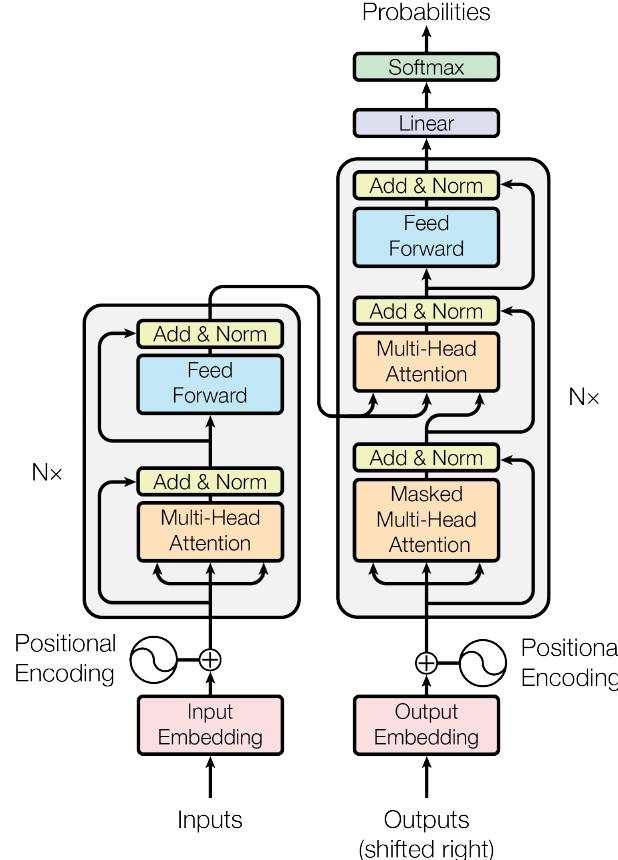

In [51]:
import base64
from IPython.display import Image, display
image_data = base64.b64decode(images[0])
display(Image(data=image_data))

In [66]:
import base64
import os

from IPython.display import Image, display

for idx, image in enumerate(images):
    try:
        image_data = base64.b64decode(image)
        path = f"image_{idx}.jpeg"

        with open(path, "wb") as f:
            f.write(image_data)

    except Exception as e:
        print(f"Error processing image {idx}: {e}")

    
        

In [69]:
import ollama

def get_image_summary(file_path):

    response = ollama.chat(
        model='llama3.2-vision',
        messages=[{
            'role': 'user',
            'content': 'Summarize the image:',
            'images': [file_path]
        }]
    )
    return response.message.content

In [72]:
# import os
# from tqdm import tqdm

# image_summaries = []

# for i in tqdm(range(len(images))):
#     file_path = f"image_{i+1}.jpeg"
#     summary = get_image_summary(file_path)
#     image_summaries.append(summary)



In [73]:
import pickle

with open("image_summaries.pickle", "rb") as h:
    image_summaries = pickle.load(h)

In [75]:
display(Markdown(image_summaries[5]))

This appears to be a set of rules for using punctuation marks. The lines are similar to how one might write out "The law will never be perfect, but its application should be just."  There are also missing words such as "are" and "in". This could potentially be used to teach people to properly use punctuation in writing.

In [76]:
from tqdm import tqdm
def get_text_summary(text):

    response = ollama.chat(
        model='llama3.2:1b',
        messages=[{
            'role': 'user',
            'content': f'Summarize this text {text}'
        }]
    )
    
    return response.message.content

text_summaries = [get_text_summary(texts[i].text) \
                  for i in tqdm(range(len(texts)))]

100%|██████████| 13/13 [00:57<00:00,  4.45s/it]


In [ ]:
display(Markdown(text_summaries[1]))

In [82]:
def get_table_summary(table_html):

    response = ollama.chat(
        model='llama3.2:1b',
        messages=[{
            'role': 'user',
            'content': f'Summarize this table: {table_html}'
        }]
    )
    
    return response.message.content

table_summaries = [get_table_summary(tables[i].metadata.text_as_html) \
                   for i in tqdm(range(len(tables)))]

100%|██████████| 4/4 [00:17<00:00,  4.38s/it]


In [84]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from tqdm import tqdm



def batch_iterate(lst, batch_size):
    for i in range(0, len(lst), batch_size):
        yield lst[i : i + batch_size]

class EmbedData:

    def __init__(self, 
                 embed_model_name="nomic-ai/nomic-embed-text-v1.5",
                 batch_size=32):
        
        self.embed_model_name = embed_model_name
        self.embed_model = self._load_embed_model()
        self.batch_size = batch_size
        self.embeddings = []

    def _load_embed_model(self):
        embed_model = HuggingFaceEmbedding(model_name=self.embed_model_name,
                                           trust_remote_code=True,
                                           cache_folder='./hf_cache')
        return embed_model

    
    def generate_embedding(self, context):
        return self.embed_model.get_text_embedding_batch(context)
    
    def embed(self, contexts):
        self.contexts = contexts
        
        total_batches = (len(contexts) + self.batch_size - 1) // self.batch_size

        with tqdm(total=total_batches, desc="Embedding data", unit="batch") as pbar:
            for batch_context in batch_iterate(contexts, self.batch_size):
                batch_embeddings = self.generate_embedding(batch_context)
                self.embeddings.extend(batch_embeddings)
                pbar.update(1)  

In [ ]:
batch_size = 32

embeddata = EmbedData(batch_size=batch_size)

embeddata.embed(text_summaries + image_summaries + table_summaries)

!!!!!!!!!!!!megablocks not available, using torch.matmul instead
<All keys matched successfully>
Embedding data: 100%|██████████| 1/1 [00:07<00:00,  7.12s/batch]


In [89]:
import time
from qdrant_client import QdrantClient
from qdrant_client import models 
class QdrantVDB:
    """Class to handle Qdrant vector database operations."""
    
    def __init__(self, collection_name, vector_dim=768, batch_size=512):
        self.collection_name = collection_name
        self.batch_size = batch_size
        self.vector_dim = vector_dim
        self.client = None

    def define_client(self):
        """Initialize the Qdrant client with retry logic."""
        retries = 3
        while retries > 0:
            try:
                self.client = QdrantClient(
                    url="http://localhost:6333",
                    prefer_grpc=True,
                    timeout=10.0  # Add timeout
                )
                print("Successfully connected to Qdrant server")
                break
            except Exception as e:
                retries -= 1
                print(f"Connection error: {e}. Retries left: {retries}")
                time.sleep(2)  # Wait before retry
                
        if retries == 0:
            raise ConnectionError("Failed to connect to Qdrant server after multiple attempts")

    def create_collection(self):
        """Create a collection in Qdrant if it doesn't exist."""
        if self.client.collection_exists(collection_name=self.collection_name):
            print(f"Collection {self.collection_name} exists, deleting it...")
            self.client.delete_collection(collection_name=self.collection_name)
            
        self.client.create_collection(
            collection_name=self.collection_name,
            vectors_config=models.VectorParams(
                size=self.vector_dim,
                distance=models.Distance.DOT, # dot product similarity 
                on_disk=True  # store vectors on disk to optimize memory usage
            ),
            optimizers_config=models.OptimizersConfigDiff(
                default_segment_number=5,
                indexing_threshold=0
            )
        )
        print(f"Created new collection: {self.collection_name}")

    def ingest_data(self, embeddata):
        """Ingest embeddings data into the Qdrant collection in batches."""
        total_batches = (len(embeddata.contexts) + self.batch_size - 1) // self.batch_size
        
        for batch_context, batch_embeddings in tqdm(
            zip(
                batch_iterate(embeddata.contexts, self.batch_size), 
                batch_iterate(embeddata.embeddings, self.batch_size)
            ), 
            total=total_batches, 
            desc="Ingesting in batches"
        ):
            self.client.upload_collection(
                collection_name=self.collection_name,
                vectors=batch_embeddings,
                payload=[{"context": context} for context in batch_context]
            )

        # Set indexing threshold after all data is uploaded
        self.client.update_collection(
            collection_name=self.collection_name,
            optimizer_config=models.OptimizersConfigDiff(indexing_threshold=20000)
        )
        print("Finished ingesting all data")

database = QdrantVDB("attention_paper")
database.define_client()
database.create_collection()
database.ingest_data(embeddata)

Successfully connected to Qdrant server
Collection attention_paper exists, deleting it...
Created new collection: attention_paper


Ingesting in batches: 100%|██████████| 1/1 [00:00<00:00, 42.32it/s]

Finished ingesting all data


In [93]:
class Retriever:

    def __init__(self, vector_db, embeddata):
        
        self.vector_db = vector_db
        self.embeddata = embeddata

    def search(self, query):
        query_embedding = self.embeddata.embed_model.get_query_embedding(query)
            
        # Start the timer
        start_time = time.time()
        
        result = self.vector_db.client.search(
            collection_name=self.vector_db.collection_name,
            
            query_vector=query_embedding,
            
            search_params=models.SearchParams(
                quantization=models.QuantizationSearchParams(
                    ignore=True,
                    rescore=True,
                    oversampling=2.0,
                )
            ),
            
            timeout=1000,
        )
        
        # End the timer
        end_time = time.time()
        elapsed_time = end_time - start_time

        print(f"Execution time for the search: {elapsed_time:.4f} seconds")

        return result


In [98]:
display(Retriever(database, embeddata).search("Sample query")[0])

Execution time for the search: 0.0079 seconds


C:\Users\Bidhi\AppData\Local\Temp\ipykernel_7388\3732059156.py:14: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  result = self.vector_db.client.search(


ScoredPoint(id='1f3d89b9-8254-493b-a807-e21a6c23debb', version=0, score=0.5739913582801819, payload={'context': "Here's a summary of the text:\n\nAn attention function maps a query and key-value pairs to an output vector. The output is computed as a weighted sum of the values. There are two commonly used types of attention functions: \n\n1. Scaled Dot-Product Attention, which computes weights using dot products with keys and softmax.\n2. Multi-Head Attention, which is faster and more space-efficient but may not perform as well for larger values of dimension d.\n\nIn practice, attention is often applied to a matrix Q (queries) and matrices K and V (keys and values). The output is computed using the matrix product Attention(Q, K, V), where weights are obtained by applying a softmax function to the dot products."}, vector=None, shard_key=None, order_value=None)

In [120]:
from llama_index.llms.ollama import Ollama
class RAG:

    def __init__(self,
                 retriever,
                 llm_name="llama3.2:1b"):
        
        self.llm_name = llm_name
        self.llm = self._setup_llm()
        self.retriever = retriever
        self.qa_prompt_tmpl_str = """Context information is below.
                                     ---------------------
                                     {context}
                                     ---------------------
                                     
                                     Given the context information above I want you
                                     to think step by step to answer the query in a
                                     crisp manner, incase case you don't know the
                                     answer say 'I don't know!'
                                     
                                     ---------------------
                                     Query: {query}
                                     ---------------------
                                     Answer: """
    def _setup_llm(self):
        return Ollama(model=self.llm_name)
        
    def generate_context(self, query):
    
        result = self.retriever.search(query)
        context = [dict(data) for data in result]
        # display(context) --> to see context for debugging
        combined_prompt = []

        for entry in context:
            context = entry["payload"]["context"]

            combined_prompt.append(context)

        return "\n\n---\n\n".join(combined_prompt)
    
    def query(self, query):
        context = self.generate_context(query=query)
        
        prompt = self.qa_prompt_tmpl_str.format(context=context,
                                                query=query)
        
        response = self.llm.complete(prompt)
        
        return dict(response)['text']

In [118]:
res = Retriever(database, embeddata).search("Sample query")[0]
display(res)

Execution time for the search: 0.0080 seconds


C:\Users\Bidhi\AppData\Local\Temp\ipykernel_7388\3732059156.py:14: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  result = self.vector_db.client.search(


ScoredPoint(id='1f3d89b9-8254-493b-a807-e21a6c23debb', version=0, score=0.5739913582801819, payload={'context': "Here's a summary of the text:\n\nAn attention function maps a query and key-value pairs to an output vector. The output is computed as a weighted sum of the values. There are two commonly used types of attention functions: \n\n1. Scaled Dot-Product Attention, which computes weights using dot products with keys and softmax.\n2. Multi-Head Attention, which is faster and more space-efficient but may not perform as well for larger values of dimension d.\n\nIn practice, attention is often applied to a matrix Q (queries) and matrices K and V (keys and values). The output is computed using the matrix product Attention(Q, K, V), where weights are obtained by applying a softmax function to the dot products."}, vector=None, shard_key=None, order_value=None)

In [121]:
retriever = Retriever(database, embeddata)

rag = RAG(retriever)

In [122]:
query = """What are the types of model 
           architectures proposed in the paper?"""

answer = rag.query(query)

C:\Users\Bidhi\AppData\Local\Temp\ipykernel_7388\3732059156.py:14: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  result = self.vector_db.client.search(


Execution time for the search: 0.0072 seconds


In [123]:
display(Markdown(answer))

Based on the provided context information, here is a step-by-step analysis to determine the types of model architectures proposed in the paper:

1. **Stacked Self-Attention and Fully Connected Layers**: This architecture consists of multiple stacks of self-attention mechanisms followed by fully connected layers.

2. **Residual Connection-based Encoder with Multi-Head Attention and Feed-Forward Networks**: This architecture uses residual connections between sub-layers in the encoder stack and additional multi-head attention mechanisms in both the encoder and decoder stacks.

3. **Stacked Layers with Positional Encoding and Masking**: This architecture consists of multiple stacked layers, each with a different component (self-attention, feed-forward network, etc.). The self-attention mechanism is used to model relationships between positions in the input sequence, while positional encoding ensures that position information is preserved across layers. Masking is used to prevent attention from attending to subsequent positions in the output sequence.

Given this analysis, I don't know!

In [127]:
query = """What is the BLUE score for MoE model?"""

answer = rag.query(query)

C:\Users\Bidhi\AppData\Local\Temp\ipykernel_7388\3732059156.py:14: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  result = self.vector_db.client.search(


Execution time for the search: 0.0068 seconds


In [128]:
display(Markdown(answer))

The Blue (BLEU) score for the MoE (Model-based Entity Representation) model in the text is not explicitly stated. However, based on the context, it appears that the MoE model achieved a score of around 26.03 on the English-DE dataset, with a range of 2.0 to 10^9.

The MoE model was one of several models compared in the table, and its performance was found to be comparable to other models on the WMT 2014 English-DE task. However, it's worth noting that the exact scores are not provided in the text.

If you're looking for information on the Blue score for the MoE model, I recommend checking the original source or table that presents the performance metrics for this specific model.